In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import pandas as pd

# Load your dataset
df = pd.read_excel(r"C:\Users\sdkag\OneDrive\Documents\Research Project Dataset(AutoRecovered).xlsx",sheet_name='Sheet2')  # Replace with your file path
df['month'] = pd.to_datetime(df['month'])
df

,month,Arrival(in ton),modal price,temprature,Rain Days,rainfall
0,2010-01-01,18.108688,952.799068,33.333333,2,1.94
1,2010-02-01,19.938417,937.459645,38.333333,0,0.00
2,2010-03-01,24.788689,949.015482,40.555556,3,0.52
3,2010-04-01,24.663240,1008.844008,40.555556,2,44.99
4,2010-05-01,14.229670,1017.568627,38.333333,4,3.66
...,...,...,...,...,...,...
172,2024-05-01,21.294051,2537.236682,25.000000,1,47.08
173,2024-06-01,16.947092,2473.844760,25.000000,20,95.33
174,2024-07-01,13.303412,2480.717893,23.888889,32,53.53
175,2024-08-01,13.501367,2461.471763,23.888889,29,19.02


In [2]:
df.month = pd.to_datetime(df.month)
df = df.set_index("month")
df.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall
month,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94
2010-02-01,19.938417,937.459645,38.333333,0,0.00
2010-03-01,24.788689,949.015482,40.555556,3,0.52
2010-04-01,24.663240,1008.844008,40.555556,2,44.99
2010-05-01,14.229670,1017.568627,38.333333,4,3.66


In [3]:
df.index = pd.to_datetime(df.index)


df['month'] = df.index.month
df['year'] = df.index.year


df.head()  

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,month,year
month,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,1,2010
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2,2010
2010-03-01,24.788689,949.015482,40.555556,3,0.52,3,2010
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,4,2010
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,5,2010


In [4]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'


df['season'] = df['month'].apply(month_to_season)


df = df.drop(columns=['month'])


In [5]:
season_dummies = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season_dummies], axis=1)

df.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,year,season,season_Autumn,season_Spring,season_Summer,season_Winter
month,,,,,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,2010,Winter,False,False,False,True
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2010,Winter,False,False,False,True
2010-03-01,24.788689,949.015482,40.555556,3,0.52,2010,Spring,False,True,False,False
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,2010,Spring,False,True,False,False
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,2010,Spring,False,True,False,False


In [6]:
df.columns

Index(['Arrival(in ton)', 'modal price', 'temprature', 'Rain Days', 'rainfall',
       'year', 'season', 'season_Autumn', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [7]:
# Create lagged features for price
df['lagged_arrival'] = df['Arrival(in ton)'].shift(1)

In [8]:
from sklearn.model_selection import train_test_split 
# Define features (X) and target (y) using the DataFrame columns
X = df[['rainfall', 'Rain Days','lagged_arrival','temprature','modal price'] + list(season_dummies.columns)]
y = df['Arrival(in ton)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# First XGBoost model for Pima Indians dataset
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import numpy as np


In [10]:
rf_model = RandomForestRegressor(
    n_estimators=100,         # Number of trees, tune as needed
    max_depth=10,             # Maximum depth of each tree, tune as needed
    random_state=42,
    min_samples_split=5,      # Minimum samples to split an internal node
    min_samples_leaf=2        # Minimum samples for a leaf node
)



In [26]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train1 = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


In [27]:
train_mape = mean_absolute_percentage_error(y_train, y_pred_train1) * 100
test_mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
test_mse = mean_squared_error(y_test, y_pred_test)


In [28]:
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test MSE: {test_mse:.4f}")


Train MAPE: 11.68%
Test MAPE: 25.00%
Test MSE: 13.9903


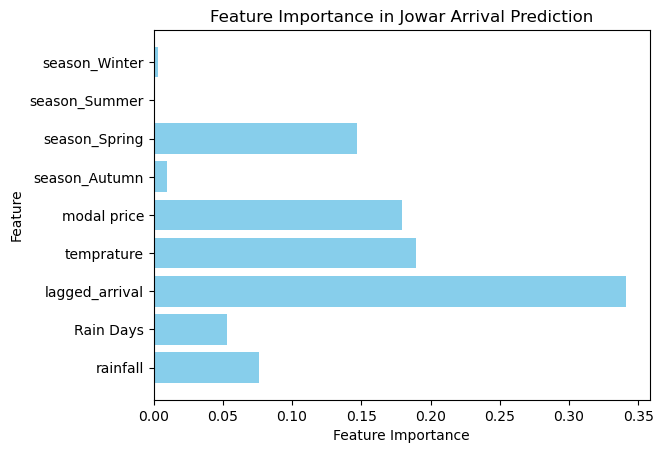

In [29]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Jowar Arrival Prediction")
plt.show()

Text(0.5, 1.0, 'Random Forest: Predicted vs. Actual Arrival')

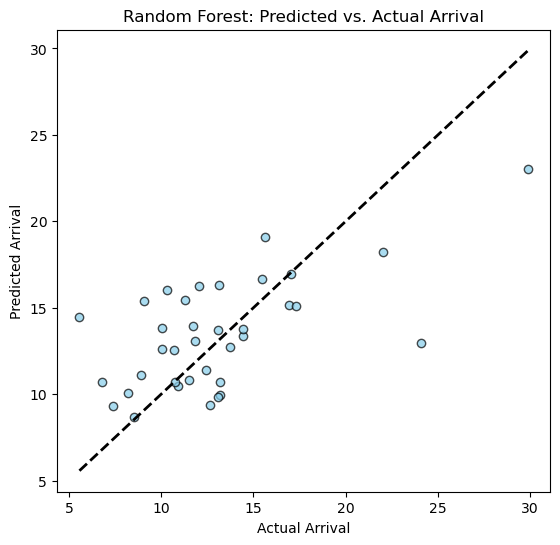

In [30]:
import matplotlib.pyplot as plt
# Plot for Random Forest
plt.figure(figsize=(14, 6))
# Subplot for Random Forest predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, color="skyblue", edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
plt.xlabel("Actual Arrival")
plt.ylabel("Predicted Arrival")
plt.title("Random Forest: Predicted vs. Actual Arrival")


In [31]:
forecast_horizon =12
future_index = np.arange(len(df), len(df) + forecast_horizon)  # Future index for plotting
# Use the last known data pattern to create placeholders for forecast
last_known_data = X.iloc[-forecast_horizon:].copy()  
forecasted_values = rf_model.predict(last_known_data)
forecasted_values

array([14.7165519 , 15.89758232, 11.94046507, 15.4568624 , 16.21150782,
       23.02545809, 23.76454243, 21.40956869, 15.17412208, 13.88403668,
       13.8100854 , 15.35863426])

In [33]:
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
test_results = test_results.sort_index() 

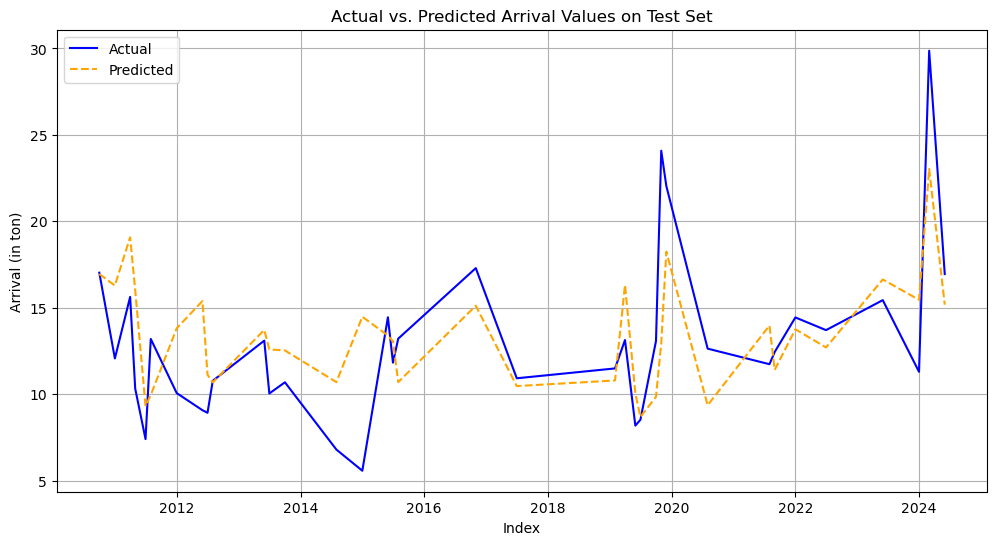

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(test_results.index, test_results['Actual'], label='Actual', color='blue')
plt.plot(test_results.index, test_results['Predicted'], label='Predicted', color='orange', linestyle='--')

# Customize plot
plt.xlabel('Index')
plt.ylabel('Arrival (in ton)')
plt.title('Actual vs. Predicted Arrival Values on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
forecast_start_date = test_results.index[-1] + pd.DateOffset(1)  # Start one period after the last test set index
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_horizon, freq='M')  # Monthly frequency

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({'Forecasted': forecasted_values}, index=forecast_index)

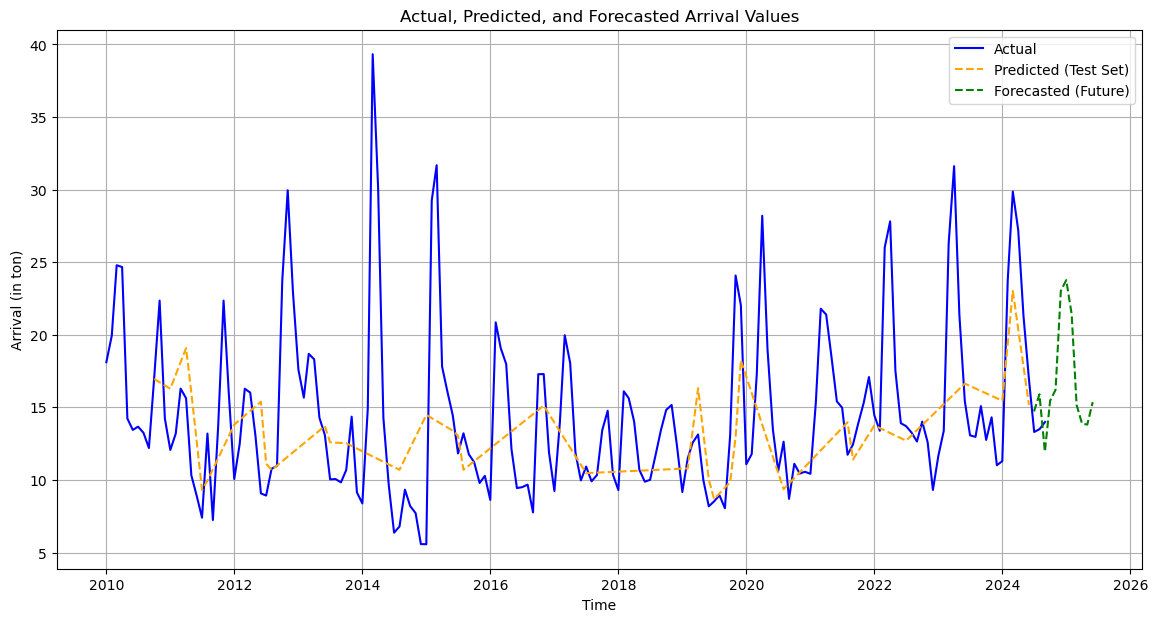

In [37]:
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(df.index, y, label='Actual', color='blue')

# Plot predicted values on the test set
plt.plot(test_results.index, test_results['Predicted'], label='Predicted (Test Set)', color='orange', linestyle='--')

# Plot forecasted values with a dashed line for distinction
plt.plot(forecast_df.index, forecast_df['Forecasted'], label='Forecasted (Future)', color='green', linestyle='--')

# Customize plot
plt.xlabel('Time')
plt.ylabel('Arrival (in ton)')
plt.title('Actual, Predicted, and Forecasted Arrival Values')
plt.legend()
plt.grid(True)
plt.show()